<!-- !split -->
(sec:LinearModels)=
# Linear models

```{epigraph}
> "As always in life, people want a simple answer; ... and it’s always wrong."

-- Susan Greenfield
```

In this chapter we will discuss models $\modeloutput$ that are linear in their parameters $\pars$. Although linear models are simple, they are sometimes useful for analyzing real-world data. 

## Definition of linear models

In **linear modeling** the dependence on the model parameters $\pars$ is **linear**, and this fact will make it possible to express that regression analysis as a linear algebra problem, and as we will show it will be possible to find an analytical expression for the optimal set of model parameters. Note that we will mostly operate with models depending on more than one parameter. Hence, we denote the parameters ($\pars$) using a bold symbol. In this chapter we will, however, consider models ($\modeloutput$) that relate a single dependent variable ($\output$) with a single independent one ($\inputt$).

The linear parameter dependence implies that our model separates into a sum of parameters times basis functions. Assuming $N_p$ different basis functions we have

$$
\model{\pars}{\inputt} = \sum_{j=0}^{N_p-1} \para_j f_j(\inputt).
$$ (eq_linear_model)

Note that there is no $\pars$-dependence in the basis functions $f_j(\inputt)$.

From a machine-learning perspective the different basis functions are known as **features**.

```{prf:example} Polynomial basis functions
:label: example:polynomial-linear-model

A common linear model corresponds to the use of polynomial basis functions $f_j(x) = x^j$. A polynomial model of degree $N_p-1$ would then be written

$$
M(\pars;\inputt) = \sum_{j=0}^{N_p-1} \para_j \inputt^j.
$$ (eq_polynomial_basis)

Note that the $j=0$ basis function is $f_0(x) = x^0 = 1$ such that the $\para_0$ parameter becomes the intercept.
```

```{prf:example} Liquid-drop model for nuclear binding energies
:label: example:LinearModels:liquid-drop-model

The liquid drop model is useful for a phenomenological description of nuclear binding energies (BE) as a function of the mass number $A$ and the number of protons $Z$, neutrons $N$

\begin{equation}
\text{BE}(A,N,Z) = a_0+a_1A+a_2A^{2/3}+a_3 Z^2 A^{-1/3}+a_4 (N-Z)^2 A^{-1}.
\end{equation}

We have five features: the intercept (constant term, bias), the $A$ dependent volume term, the $A^{2/3}$ surface term and the Coulomb $Z^2 A^{-1/3}$ and pairing $(N-Z)^2 A^{-1}$ terms. Although the features are somewhat complicated functions of the independent variables $A,N,Z$, we note that the $p=5$ regression parameters $\pars = (a_0, a_1, a_2, a_3, a_4)$ enter linearly. 
```

## Regression analysis with linear models

When performing a regression analysis with a linear model, i.e., doing linear regression, we have access to a set of data $\mathcal{D}$ for the dependent variable, i.e., 

\begin{equation}
\data = [y_1, y_2,\dots, y_{N_d}]^T.
\end{equation}

For each datum there is an independent variable $x_i$, and our model for each datum $y_i$ is

\begin{equation}
M_i \equiv M(\pars;x_i) = \sum_{j=0}^{N_p-1} \para_j f_j(x_i).
\end{equation}

We can collect the basis function evaluated at each independent variable $x_i$ in a matrix $\mathbf{X}$ of dimension $N_d \times N_p$

$$
\dmat = 
	\begin{bmatrix} 
        f_0(x_1) & \ldots & f_{N_p-1}(x_1) \\
        f_0(x_2) & \ldots & f_{N_p-1}(x_2) \\
        \vdots  & \ddots & \vdots \\
        f_0(x_{N_d}) & \ldots & f_{N_p-1}(x_{N_d})
    \end{bmatrix}
$$ (eq:LinearModels:design-matrix)

This matrix will be referred to as a **design matrix**. 

```{prf:example} The design matrix for polynomial models
:label: example:design-matrix-polynomial-models

The design matrix for a linear model with polynomial basis functions becomes

\begin{equation}
\dmat =
\begin{bmatrix} 
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{p-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{p-1}\\
1& x_{3}^1 &x_{3}^2& \dots & \dots &x_{3}^{p-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{N_d}^1 &x_{N_d}^2& \dots & \dots &x_{N_d}^{p-1}\\
\end{bmatrix}, 
\end{equation}

where we are considering a polynomial of degree $p-1$ which implies a model with $p$ features (including the intercept). It is also known within linear algebra as a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).
```

Next, we introduce a column vector for the parameters 

\begin{equation}
\pars = [\para_0,\para_1, \para_2,\dots, \para_{N_p-1}]^T,
\end{equation}

and we arrive at the matrix equation

\begin{equation}
\data = \dmat \pars+\boldsymbol{\epsilon}.
\end{equation}

The last term $\boldsymbol{\epsilon}$ is a column vector of so-called **residuals**. This term expresses the part of the dependent variable, for which we have data, that we cannot describe using a linear model. Formally, we can therefore write $\epsilon_i = y_i - M_i$ and define the vector as

\begin{equation}
\residuals = [\residual_1,\residual_2, \residual_3,\dots, \residual_{N_d}]^T.
\end{equation}

It is important to realize that our model $M$ provides an approximate description of the data. Indeed, *all models are wrong* and in a realistic setting we have no guarantee that the data is generated by a linear process. Of course, based on physics insight, or other assumptions, there might exists very good reasons for using a linear model to explain the data.

### The normal equation

A regression analysis often aims at finding the model parameters $\pars$ of a model $M$ such that the vector of errors $\boldsymbol{\epsilon}$ is minimized in the sense of its Euclidean norm (or 2-norm). You might ask the very relevant question why this particular goal is desirable. We will return to this consideration in [](sec:BayesianLinearRegression). Nevertheless, in order to find the "optimal" set of parameters $\pars^*$ we seek to minimize

$$
C(\pars)\equiv \sum_{i=1}^{N_d} \epsilon_i^2 = \sum_{i=1}^{N_d}\left(y_i-M_i\right)^2 = \left\{\left(\data-\dmat \pars\right)^T\left(\data-\dmat \pars\right)\right\}.
$$ (eq:LinearRegression:cost-function)

The solution to this optimization problem turns out to be a solution of the normal equation and is known as ordinary least-squares or ordinary linear regression.

````{prf:theorem} Ordinary least squares (the normal equation)
:label: theorem:LinearModels:normal-equation

The ordinary least-squares method corresponds to finding the optimal parameter vector $\pars^*$ that minimizes the Euclidean norm of the residual vector $\boldsymbol{\epsilon} = \data - \dmat \pars$, where $\data$ is a column vector of observations and $\dmat$ is the design matrix {eq}`eq:LinearModels:design-matrix`. 

Finding this optimum turns out to correspond to solving the **normal equation** 

$$
\dmat^T\data = \dmat^T\dmat\pars^*.  
$$ (eq:NormalEquation)

Given that the **normal matrix** $\dmat^T\dmat$ is invertible, the solution to the normal equation is given by 

$$
\pars^* =\left(\dmat^T\dmat\right)^{-1}\dmat^T\data.
$$ (eq:LinearModels:OLS_optimum)
````

````{prf:proof}
Due to its quadratic form, the Euclidean norm $\left| \boldsymbol{\epsilon} \right|_2^2 = \left(\data-\dmat\pars\right)^T\left(\data-\dmat\pars\right) \equiv C(\pars)$ is bounded from below and we just need to find the single extremum. That is we need to solve the problem

\begin{equation}
\pars^* =
{\displaystyle \mathop{\mathrm{arg} \min}_{\pars\in
{\mathbb{R}}^{N_p}}} \left(\data-\dmat\pars\right)^T\left(\data-\dmat\pars\right).
\end{equation}

In practical terms it means we will require

\begin{align}
\frac{\partial C(\pars)}{\partial \para_j} = \frac{\partial }{\partial \para_j} \Bigg[  \sum_{i=1}^{N_d}\Big(y_i &-\para_0 f_0(x_i)-\para_1f_1(x_i)-\para_2f_2(x_i)-\dots \\
&-  \para_{N_p-1}f_{N_p-1}(x_i)\Big)^2\Bigg] = 0, 
\end{align}

where $y_i$ and $f_j(x_i)$ are the elements of $\data$ and $\dmat$, respectively. Performing the derivative results in

$$
\frac{\partial C(\pars)}{\partial \para_j} = -2\Bigg[ \sum_{i=1}^{N_d}f_j(x_i)\Big(y_i &-\para_0 f_0(x_i)-\para_1f_1(x_i)-\para_2f_2(x_i)-\dots \\
&-\para_{N_p-1}f_{N_p-1}(x_i)\Big)\Bigg]=0,
$$ (eq:LinearModels:gradient-elements)

which is one element of the full gradient vecor. This gradient vector can be succinctly expressed in matrix-vector form as

$$
\boldsymbol{\nabla}_{\pars} C(\pars) = -2 \dmat^T\left( \data-\dmat\pars\right).  
$$ (eq:LinearRegression:gradient)

The minimum of $C$, where $\boldsymbol{\nabla}_{\pars} C(\pars) = 0$, then corresponds to 

$$
\dmat^T\data = \dmat^T\dmat\pars^*,  
$$

which is the normal equation. Finally, if the matrix $\dmat^T\dmat$ is invertible then we have the solution

$$
\pars^* =\left(\dmat^T\dmat\right)^{-1}\dmat^T\data.
$$
````

We note also that since our design matrix is defined as $\dmat\in
{\mathbb{R}}^{N_d\times N_p}$, the product $\dmat^T\dmat \in
{\mathbb{R}}^{N_p\times N_p}$. The product $\left(\dmat^T\dmat\right)^{-1}\dmat^T$ is called the pseudo-inverse of the design matrix $\dmat$. The pseudo-inverse is a generalization of the usual matrix inverse. The former can be defined for also for non-square matrices that are not necessarily full rank. In the case of full-rank and square matrices the pseudo-inverse is equal to the usual inverse.

The regression residuals $\boldsymbol{\epsilon}^{*} =  \data - \dmat \pars^{*}$ can be used to obtain an estimator $s^2$ of the variance of the residuals

$$
s^2 = \frac{(\boldsymbol{\epsilon}^*)^T\boldsymbol{\epsilon}^*}{N_d-N_p},
$$

where $N_p$ is the number of parameters in the model and $N_d$ is the number of data.

(sec:ols_warmup)=
## Ordinary linear regression: warmup

To warm up, and get acquainted with the notation and formalism, let us work out a small example. Assume that we have the situation where we have collected two datapoints $\data = [y_1,y_2]^T = [-3,3]^T$ for the predictor values $[x_1,x_2]^T = [-2,1]^T$.

This data could have come from any process, even a non-linear one. But this is artificial data that I generated by evaluating the function $y = 1 + 2x$ at $x=x_1=-2$ and $x=x_2=1$. Clearly, the data-generating mechanism is very simple and corresponds to a linear model $y = \theta_0 + \theta_1 x$ with $[\theta_0,\theta_1] = [1,2]$. This is the kind of information we *never* have in reality. Indeed, we are always uncertain about the process that maps input to output, and as such our model $M$ will always be wrong. We are also uncertain about the parameters $\pars$ of our model. These are the some of the fundamental reasons for why it can be useful to operate with a Bayesian approach where we can assign probabilities to any quantity and statement. In this example, however, we will continue with the standard (frequentist) approach based on finding the parameters that minimize the squared errors (i.e., the norm of the residual vector).

We will now assume a linear model with polynomial basis up to order one to model the data, i.e.,

$$
M(\pars;\inputt) = \para_0 + \para_1 \inputt,
$$

which we can express in terms of a design matrix $\dmat$ and (unknown) parameter vector $\pars$ as $M = \dmat \pars$.

In the present case the two unknowns $\pars = [\para_0,\para_1]^T$ can be fit to the two datapoints $\data = [-3,3]^T$ using pen a paper. 

```{exercise}
:label: exercise:ols_example_1
In the example above you have two data points and two unknowns, which means you can easily solve for the model parameters using a conventional matrix inverse.
Do the numerical calculation to make sure you have setup the problem correctly.
```

```{exercise}
:label: exercise:ols_example_2
Evaluate the normal equations for the design matrix $\dmat$ and data vector $\data$ in the example above.
```

```{exercise}
:label: exercise:ols_example_3
Evaluate the sample variance $s^2$ for the example above. Do you think the result makes sense?
```

(sec:ols_in_practice)=
## Ordinary linear regression in practice

We often have situation where we have much more than just two datapoints, and they rarely  fall exactly on a straight line. Let's use python to generate some more realistic, yet artificial, data. Using the function below you can generate data from some linear process with random variables for the underlying parameters. We call this a data-generating process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def data_generating_process_reality(model_type, rng=np.random.default_rng(), **kwargs):
  if model_type == 'polynomial':
      true_params = rng.uniform(low=-5.0, high=5, size=(kwargs['poldeg']+1,))
      #polynomial model   
      def process(params, xdata):
          ydata = np.polynomial.polynomial.polyval(xdata,params)
          return ydata
      
  # use this to define a non-polynomial (possibly non-linear) data-generating process
  elif model_type == 'nonlinear':
      true_params = None
      def process(params, xdata):
          ydata = (0.5 + np.tan(np.pi*xdata))**2
          return ydata           
  else:
      print(f'Unknown Model')
      
  # return function for the true process the values for the true parameters
  # and the name of the model_type
  return process, true_params, model_type    

Next, we make some measurements of this process, and that typically entails some measurement errors. We will here assume that independently and identically distributed (i.i.d.) measurement errors $e_i$ that all follow a normal distribution with zero mean and variance $\sigma_e^2$. In a statistical notation we write $e_i \sim \mathcal{N}(0,\sigma_e^2)$. By default, we set $\sigma_e = 0.5$.

In [2]:
def data_generating_process_measurement(process, params, xdata, 
                           sigma_error=0.5, rng=np.random.default_rng()):
      
  ydata = process(params, xdata)
  
  #  sigma_error: measurement error. 
  error = rng.normal(0,sigma_error,len(xdata)).reshape(-1,1)

  return ydata+error, sigma_error*np.ones(len(xdata)).reshape(-1,)

Let us setup the data-generating process, in this case a linear process of polynomial degree 1, and decide how many measurements we make ($N_d=10$). All relevant output is stored in pandas dataframes.

In [3]:
#the number of data points to collect
# -----
Nd = 10
# -----

# predictor values
xmin = -1 ; xmax = +1
Xmeasurement = np.linspace(xmin,xmax,Nd).reshape(-1,1)
# store it in a pandas dataframe
pd_Xmeasurement = pd.DataFrame(Xmeasurement, columns=['x'])

# Define the data-generating process.
# Begin with a polynomial (poldeg=1) model_type
# in a second run of this notebook you can play with other linear models
reality, true_params, model_type = data_generating_process_reality(model_type='polynomial',poldeg=1)

print(f'model type      : {model_type}')
print(f'true parameters : {true_params}')
print(f'Nd = {Nd}')

# Collect measured data
# -----
sigma_e = 0.5
# -----
Ydata, Yerror = data_generating_process_measurement(reality,true_params,Xmeasurement,sigma_error=sigma_e)
# store the data in a pandas dataframe
pd_D=pd.DataFrame(Ydata,columns=['data'])
# 
pd_D['x'] = Xmeasurement
pd_D['e'] = Yerror

# We will also produce a denser grid for predictions with our model and comparison with the true process. This is useful for plotting
   
xreality = np.linspace(xmin,xmax,200).reshape(-1,1)
pd_R = pd.DataFrame(reality(true_params,xreality), columns=['data'])
pd_R['x'] = xreality

model type      : polynomial
true parameters : [-0.0460025  -4.88932712]
Nd = 10


Create some analysis tool to inspect the data, and later on the model.

In [4]:
# helper function to plot data, reality, and model (pd_M)
def plot_data(pd_D, pd_R, pd_M, with_errorbars = True):
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(pd_D['x'],pd_D['data'],label=r'Data',color='black',zorder=1, alpha=0.9,s=70,marker="d");
    if with_errorbars:
        ax.errorbar(pd_D['x'],pd_D['data'], pd_D['e'],fmt='o', ms=0, color='black');
    if pd_R is not None:
        ax.plot(pd_R['x'], pd_R['data'],color='red', linestyle='--',lw=3,label='Reality',zorder=10)
    if pd_M is not None:
        ax.plot(pd_M['x'], pd_M['data'],color='blue', linestyle='--',lw=3,label='Model',zorder=11)
    ax.legend();
    ax.set_title('Collected data');
    ax.set_xlabel(r'Predictor $x$');
    ax.set_ylabel(r'Response $y$');
    return fig,ax

Let's have a look at the data. We set the last two arguments to `None` for visualizing only the data.

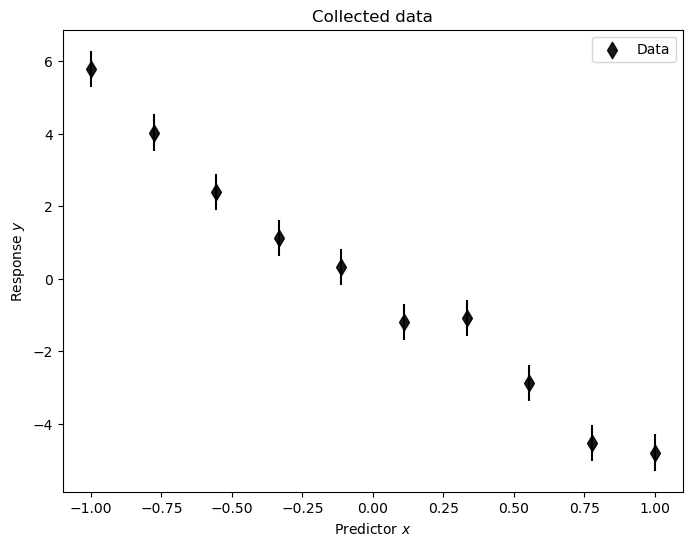

In [5]:
plot_data(pd_D, None, None);

Linear regression proceeds via the design matrix. We will analyze this data using a linear polynomial model of order 1. The following code will allow you to setup the corresponding design matrix $\dmat$ for any polynomial order (referred to as poldeg below)

In [6]:
def setup_polynomial_design_matrix(data_frame, poldeg, drop_constant=False, verbose=True):
    if verbose:
        print('setting up design matrix:')
        print('  len(data):', len(data_frame.index))

        # for polynomial models: x^0, x^1, x^2, ..., x^p
        # use numpy increasing vandermonde matrix
        print('  model poldeg:',poldeg)
    
    predictors = np.vander(data_frame['x'].to_numpy(), poldeg+1, increasing = True)
    if drop_constant:
        predictors = np.delete(predictors, 0, 1)
        if verbose:
            print('  dropping constant term')
    pd_design_matrix = pd.DataFrame(predictors)
        
    return pd_design_matrix

So, let's setup the design matrix for a model with polynomial basis functions. Note that there are $N_p$ parameters in a polynomial function of order $N_p-1$

$$
M(\pars;\inputt) = \theta_0 + \theta_1 \inputt.
$$

In [7]:
Np=2
pd_X = setup_polynomial_design_matrix(pd_Xmeasurement,poldeg=Np-1)

setting up design matrix:
  len(data): 10
  model poldeg: 1


We can now perform linear regression, or ordinary least squares (OLS), as

In [8]:
#ols estimator for physical parameter theta
D = pd_D['data'].to_numpy()
X = pd_X.to_numpy()

ols_cov   = np.linalg.inv(np.matmul(X.T,X))
ols_xTd   = np.matmul(X.T,D)
ols_theta = np.matmul(ols_cov,ols_xTd)

print(f'Ndata = {Nd}')
print(f'theta_ols \t{ols_theta}')
print(f'theta_true \t{true_params}\n')

Ndata = 10
theta_ols 	[-0.08367545 -5.17072042]
theta_true 	[-0.0460025  -4.88932712]



To evaluate the (fitted) model we setup a design matrix that spans dense values across the relevant range of predictors.

In [9]:
pd_Xreality = setup_polynomial_design_matrix(pd_R,poldeg=Np-1)

setting up design matrix:
  len(data): 200
  model poldeg: 1


and then we dot this with the fitted (ols) parameter values

In [10]:
Xreality = pd_Xreality.to_numpy()
pd_M_ols = pd.DataFrame(np.matmul(Xreality,ols_theta),columns=['data'])
pd_M_ols['x'] = xreality

A plot (which now includes the data-generating process 'reality') demonstrates the quality of the inference.

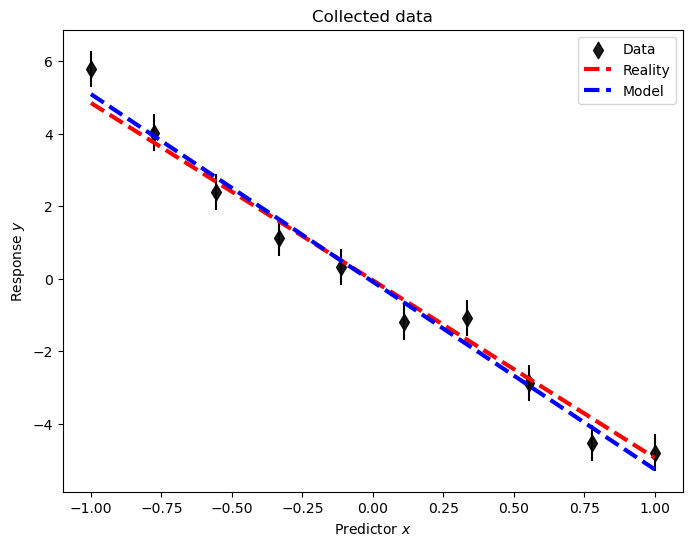

In [11]:
plot_data(pd_D, pd_R, pd_M_ols);

To conclude, we also compute the sample variance $s^2$

In [12]:
ols_D   = np.matmul(X,ols_theta)
ols_eps = (ols_D - D)
ols_s2 = (np.dot(ols_eps,ols_eps.T)/(Nd-Np))

print(f's^2       \t{ols_s2:.3f}')
print(f'sigma_e^2 \t{sigma_e**2:.3f}')

s^2       	0.267
sigma_e^2 	0.250


As seen, the extracted variance is in some agreement with the true one.

Using the code above, you should now try to do the following exercises.

```{exercise}
:label: exercise:ols_example_4
Keep working with the simple polynomial model $M = \theta_0 + \theta_1 x$

Reduce the number of data to 2, i.e., set Nd=2. Do you reproduce the result from the simple example in the previous section?

Increase the number of data to 1000. Do the OLS values of the model parameters and the sample variance approach the (true) parameters of the data-generating process? Is this to be expected? 
```

```{exercise}
:label: exercise:ols_example_5
Set the data-generating process to be a 3rd-order polynomial and set limits of the the predictor variable to [-3,3]. Analyze the data using a 2nd-order polynomial model.

Explore the limit of $N_d \rightarrow \infty$ by setting $N_d = 500$ or so. Will the OLS values of the model parameters and the sample variance approach the (true) values for some of the parameters? 
```

## Solutions

Here are answers and solutions to selected exercises.

````{solution} exercise:ols_example_1
:label: solution:ols_example_1
:class: dropdown

We have the following design matrix

$$
\dmat = \left[
    \begin{array}{cc}
        1 & -2 \\
        1 & 1
    \end{array}
\right],
$$

which in the present case yields the parameter values

$$
\pars^{*} = \dmat^{-1}\data = [1,2]^T.
$$
````

````{solution} exercise:ols_example_3
:label: solution:ols_example_3
:class: dropdown

For the warmup case we have fitted a straight line through two data points, which is always possible, and we cannot determine the sample variance. This will be even more clear when we come to [](sec:BayesianLinearRegression).

````